In [14]:
from tensorflow import keras

In [15]:
# h5 model 불러오기
model = keras.models.load_model('../Data/best-cnn-model.h5')

In [16]:
# model의 layer확인하기
model.layers

### kernel size(3x3)로 구성된 이미지 보기

In [17]:
# 32개의 노드로 구성된 layer 선택
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [18]:
# 가중치 보기
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.0059177703 0.22356857


- 가중치를 보면 히스토그램의 비율을 보면 이게 어두운 그림인지 밝은 그림인지 알수 있어

In [19]:
import matplotlib.pyplot as plt

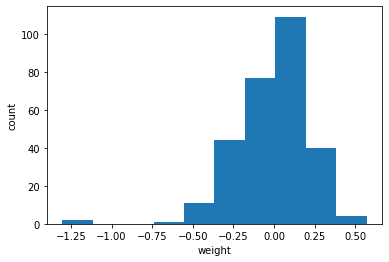

In [20]:
# 시각화 해보기

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel("weight")
plt.ylabel("count")
plt.show()

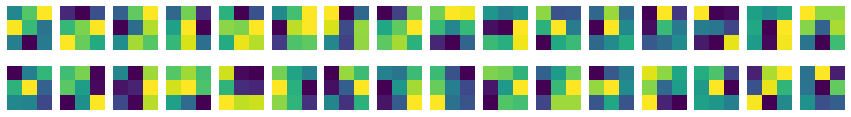

In [24]:
# 이미지로 필터[0] 확인하기

fig, axs = plt.subplots(2, 16, figsize = (15,2))
for i in range(2):# 2줄이야
    for j in range(16): # 16개야
        axs[i, j].imshow(conv_weights[:,:,0,i*16+j])
        axs[i, j].axis('off')

> epoch가 돌면서 만들어지는 필터들임

---
### 특성맵(Feature) 시각화

In [13]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 100, 100, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [22]:
# Model 불러오기
conv_acti = keras.models.Model(model.input, model.layers[0].output)

In [23]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

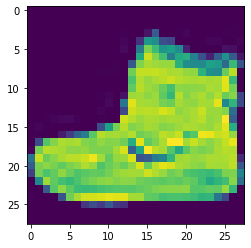

In [26]:
plt.imshow(train_input[0])
plt.show()

> 이신발에 위에 있는 커널로 비교해보는게 특성맵  
> 이색을 보고 필터가 만들어진거임.

In [28]:
# 표준화
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0

feature_map = conv_acti.predict(inputs)
print(feature_map.shape)

1/1 [==============================] - 0s 39ms/step
(1, 28, 28, 32)


2022-07-28 11:01:51.570743: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


# 이미지로 특성맵 확인하기

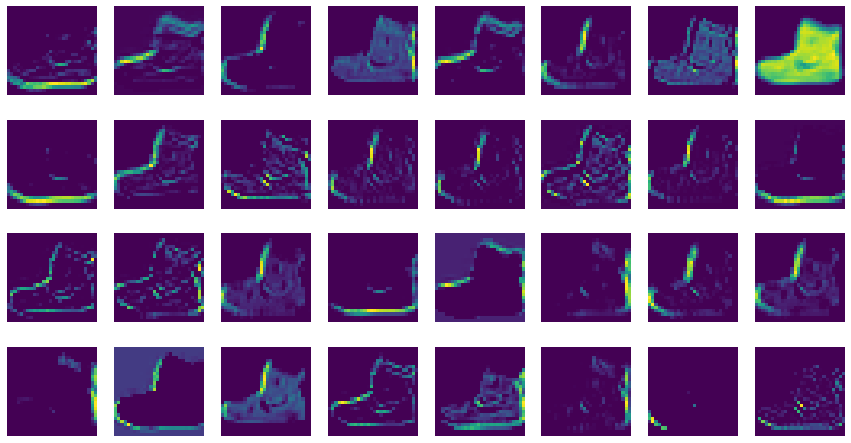

In [31]:
fig, axs = plt.subplots(4, 8, figsize = (15,8))
for i in range(4):# 4줄이야
    for j in range(8): # 8개야
        axs[i, j].imshow(feature_map[0,:,:,i*8+j]) 
        axs[i, j].axis('off')
plt.show()

> 녹색, 노란색 이 특징점으로 가지고 있는 상태  
> 이 특징점들 정보만 계속 넘겨지는거임

---
Maxpooling

In [32]:
# Model 불러오기
conv2_acti = keras.models.Model(model.input, model.layers[2].output)

In [34]:
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1) / 255.0)
print(feature_maps.shape)

1/1 [==============================] - 0s 8ms/step
(1, 14, 14, 64)


# 이미지로 맥스풀링 결과값 확인하기

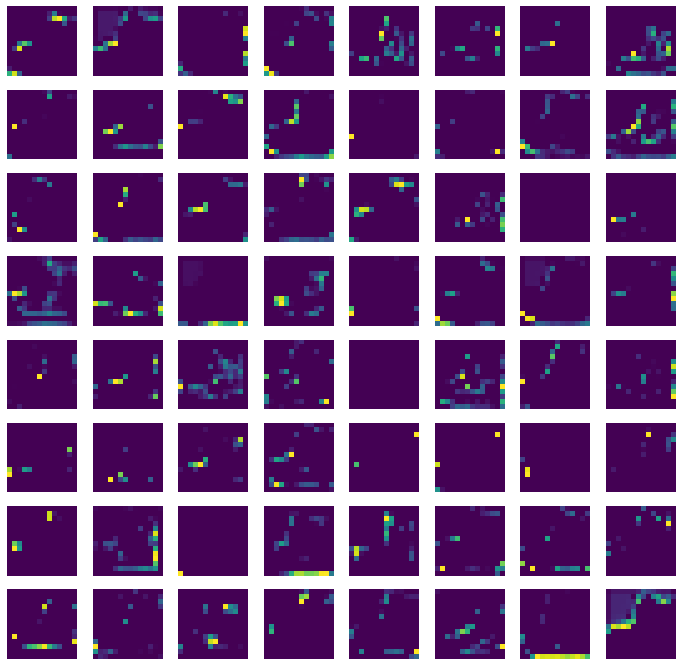

In [35]:
fig, axs = plt.subplots(8, 8, figsize = (12,12))
for i in range(8):# 4줄이야
    for j in range(8): # 8개야
        axs[i, j].imshow(feature_maps[0,:,:,i*8+j]) 
        axs[i, j].axis('off')
plt.show()

> 색깔있는 부분인 특징점인데 이부분들이 넘겨지면서 딥러닝이 계속 돌아가고 있는 상태